In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_yahoo('JPM')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,98.050003,96.620003,96.690002,97.860001,9303100.0,84.655762
2017-11-14,97.779999,96.849998,97.339996,97.269997,11043800.0,84.145378
2017-11-15,98.739998,95.949997,96.389999,98.190002,15384100.0,84.941238
2017-11-16,99.059998,98.309998,98.529999,98.470001,9808000.0,85.183472
2017-11-17,98.410004,97.570000,97.820000,98.139999,9017900.0,84.897980
...,...,...,...,...,...,...
2022-11-07,132.289993,130.479996,131.000000,131.369995,12011200.0,131.369995
2022-11-08,132.059998,130.139999,131.240005,131.449997,9884100.0,131.449997
2022-11-09,131.429993,129.220001,131.320007,129.740005,9494000.0,129.740005


In [4]:
df = df.reset_index()

In [5]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,98.050003,96.620003,96.690002,97.860001,9303100.0,84.655762
1,2017-11-14,97.779999,96.849998,97.339996,97.269997,11043800.0,84.145378
2,2017-11-15,98.739998,95.949997,96.389999,98.190002,15384100.0,84.941238
3,2017-11-16,99.059998,98.309998,98.529999,98.470001,9808000.0,85.183472
4,2017-11-17,98.410004,97.570000,97.820000,98.139999,9017900.0,84.897980
...,...,...,...,...,...,...,...
1254,2022-11-07,132.289993,130.479996,131.000000,131.369995,12011200.0,131.369995
1255,2022-11-08,132.059998,130.139999,131.240005,131.449997,9884100.0,131.449997
1256,2022-11-09,131.429993,129.220001,131.320007,129.740005,9494000.0,129.740005
1257,2022-11-10,135.250000,132.529999,132.630005,135.080002,16351600.0,135.080002


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0        97.860001
1        97.269997
2        98.190002
3        98.470001
4        98.139999
           ...    
1254    131.369995
1255    131.449997
1256    129.740005
1257    135.080002
1258    135.300003
Name: Close, Length: 1259, dtype: float64

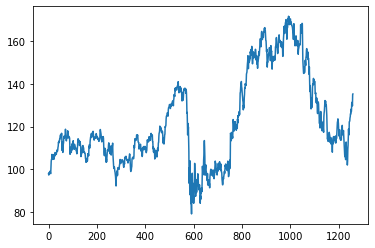

In [9]:
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.20301889],
       [0.19665766],
       [0.20657686],
       ...,
       [0.54673862],
       [0.6043127 ],
       [0.60668468]])

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(944, 315)

In [14]:
train_data

array([[0.20301889],
       [0.19665766],
       [0.20657686],
       [0.20959571],
       [0.20603774],
       [0.21541783],
       [0.21455527],
       [0.21142858],
       [0.20797845],
       [0.2037736 ],
       [0.24075474],
       [0.26630733],
       [0.27482477],
       [0.27773587],
       [0.30102424],
       [0.28776283],
       [0.2792453 ],
       [0.27590301],
       [0.29002697],
       [0.28668468],
       [0.29994609],
       [0.28549869],
       [0.27633428],
       [0.29229111],
       [0.30113208],
       [0.29628036],
       [0.29229111],
       [0.31051216],
       [0.30641507],
       [0.30177895],
       [0.30393534],
       [0.31008089],
       [0.30091648],
       [0.31180591],
       [0.3129919 ],
       [0.32355797],
       [0.31601076],
       [0.31773586],
       [0.32366581],
       [0.33660379],
       [0.34296493],
       [0.36269541],
       [0.35838273],
       [0.36614554],
       [0.36905664],
       [0.36636122],
       [0.38059302],
       [0.379

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(843, 100)
(843,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(214, 100)
(214,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 12s 318ms/step - loss: 0.0541 - val_loss: 0.0218
Epoch 2/100
14/14 [==============================] - 2s 140ms/step - loss: 0.0125 - val_loss: 0.0065
Epoch 3/100
14/14 [==============================] - 4s 312ms/step - loss: 0.0066 - val_loss: 0.0114
Epoch 4/100
14/14 [==============================] - 4s 312ms/step - loss: 0.0051 - val_loss: 0.0089
Epoch 5/100
14/14 [==============================] - 4s 308ms/step - loss: 0.0047 - val_loss: 0.0090
Epoch 6/100
14/14 [==============================] - 4s 284ms/step - loss: 0.0045 - val_loss: 0.0070
Epoch 7/100
14/14 [==============================] - 3s 171ms/step - loss: 0.0042 - val_loss: 0.0062
Epoch 8/100
14/14 [==============================] - 2s 166ms/step - loss: 0.0039 - val_loss: 0.0065
Epoch 9/100
14/14 [==============================] - 2s 144ms/step - loss: 0.0039 - val_loss: 0.0067
Epoch 10/100
14/14 [==============================] - 4s 270ms/step - loss: 0.0035 - val_l

14/14 [==============================] - 6s 404ms/step - loss: 9.7269e-04 - val_loss: 0.0017
Epoch 82/100
14/14 [==============================] - 5s 317ms/step - loss: 9.4805e-04 - val_loss: 0.0016
Epoch 83/100
14/14 [==============================] - 4s 282ms/step - loss: 9.3077e-04 - val_loss: 0.0014
Epoch 84/100
14/14 [==============================] - 2s 126ms/step - loss: 9.2667e-04 - val_loss: 0.0020
Epoch 85/100
14/14 [==============================] - 2s 129ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 86/100
14/14 [==============================] - 3s 199ms/step - loss: 9.9983e-04 - val_loss: 0.0034
Epoch 87/100
14/14 [==============================] - 4s 268ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 88/100
14/14 [==============================] - 4s 278ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 89/100
14/14 [==============================] - 4s 285ms/step - loss: 9.1450e-04 - val_loss: 0.0016
Epoch 90/100
14/14 [==============================] - 4s 264ms/step - l

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 31ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

119.74843715688293

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

128.07286943136492

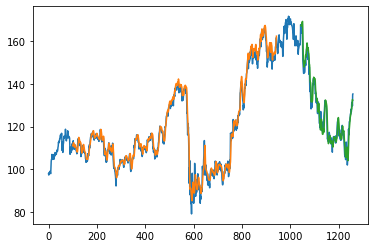

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

315

In [35]:
x_input=test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.3761725001579347,
 0.41283019855016,
 0.4026954013382328,
 0.3966576918116155,
 0.3910512590022742,
 0.3620485372620451,
 0.37757417005348726,
 0.36215637700576997,
 0.35428572086632404,
 0.38479786998820764,
 0.380916461790347,
 0.36474395505180246,
 0.36592994545990576,
 0.35450140035377353,
 0.31234502663830865,
 0.36571426597245626,
 0.3532075702019458,
 0.3830727631191039,
 0.3828571658892773,
 0.3912668562321008,
 0.38522914670548347,
 0.39018870556772234,
 0.37078166457841977,
 0.3904043027975489,
 0.3857681809088612,
 0.3916981329493766,
 0.3792991946649681,
 0.3601078331631148,
 0.3728302084210747,
 0.35935311947228776,
 0.3960108178645131,
 0.38080862204662236,
 0.39191373017920317,
 0.4243665834000169,
 0.44323450792831875,
 0.46469001050265335,
 0.4682479817269626,
 0.4808625172411979,
 0.4696495693648922,
 0.4594070146668633,
 0.4269541614460496,
 0.4058220958452662,
 0.39342315756085744,
 0.39644209458178914,
 0.42609169026912064,
 0.38425875352720695,
 0.3812398987638

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.61650795]
101
1 day input [0.4128302  0.4026954  0.39665769 0.39105126 0.36204854 0.37757417
 0.36215638 0.35428572 0.38479787 0.38091646 0.36474396 0.36592995
 0.3545014  0.31234503 0.36571427 0.35320757 0.38307276 0.38285717
 0.39126686 0.38522915 0.39018871 0.37078166 0.3904043  0.38576818
 0.39169813 0.37929919 0.36010783 0.37283021 0.35935312 0.39601082
 0.38080862 0.39191373 0.42436658 0.44323451 0.46469001 0.46824798
 0.48086252 0.46964957 0.45940701 0.42695416 0.4058221  0.39342316
 0.39644209 0.42609169 0.38425875 0.3812399  0.38145558 0.37412404
 0.38253373 0.37390836 0.3742318  0.39752025 0.42663072 0.43277627
 0.44797847 0.40280324 0.39989223 0.41876015 0.41024262 0.42188685
 0.39676553 0.36075471 0.34695418 0.32463613 0.29929921 0.28916442
 0.31223719 0.29250679 0.27460918 0.30943401 0.36377356 0.33811321
 0.31385445 0.29056609 0.27989217 0.24722372 0.2650135  0.32711595
 0.34673858 0.39708897 0.4292183  0.40409707 0.39999998 0.46576824
 0.46738543 0.47083556 0.48603776

10 day output [[0.81656194]]
11 day input [0.36474396 0.36592995 0.3545014  0.31234503 0.36571427 0.35320757
 0.38307276 0.38285717 0.39126686 0.38522915 0.39018871 0.37078166
 0.3904043  0.38576818 0.39169813 0.37929919 0.36010783 0.37283021
 0.35935312 0.39601082 0.38080862 0.39191373 0.42436658 0.44323451
 0.46469001 0.46824798 0.48086252 0.46964957 0.45940701 0.42695416
 0.4058221  0.39342316 0.39644209 0.42609169 0.38425875 0.3812399
 0.38145558 0.37412404 0.38253373 0.37390836 0.3742318  0.39752025
 0.42663072 0.43277627 0.44797847 0.40280324 0.39989223 0.41876015
 0.41024262 0.42188685 0.39676553 0.36075471 0.34695418 0.32463613
 0.29929921 0.28916442 0.31223719 0.29250679 0.27460918 0.30943401
 0.36377356 0.33811321 0.31385445 0.29056609 0.27989217 0.24722372
 0.2650135  0.32711595 0.34673858 0.39708897 0.4292183  0.40409707
 0.39999998 0.46576824 0.46738543 0.47083556 0.48603776 0.49132075
 0.50727766 0.50512128 0.52959563 0.51687334 0.51935308 0.55687325
 0.56431263 0.5651751

19 day output [[0.98202884]]
20 day input [0.38522915 0.39018871 0.37078166 0.3904043  0.38576818 0.39169813
 0.37929919 0.36010783 0.37283021 0.35935312 0.39601082 0.38080862
 0.39191373 0.42436658 0.44323451 0.46469001 0.46824798 0.48086252
 0.46964957 0.45940701 0.42695416 0.4058221  0.39342316 0.39644209
 0.42609169 0.38425875 0.3812399  0.38145558 0.37412404 0.38253373
 0.37390836 0.3742318  0.39752025 0.42663072 0.43277627 0.44797847
 0.40280324 0.39989223 0.41876015 0.41024262 0.42188685 0.39676553
 0.36075471 0.34695418 0.32463613 0.29929921 0.28916442 0.31223719
 0.29250679 0.27460918 0.30943401 0.36377356 0.33811321 0.31385445
 0.29056609 0.27989217 0.24722372 0.2650135  0.32711595 0.34673858
 0.39708897 0.4292183  0.40409707 0.39999998 0.46576824 0.46738543
 0.47083556 0.48603776 0.49132075 0.50727766 0.50512128 0.52959563
 0.51687334 0.51935308 0.55687325 0.56431263 0.56517518 0.54673862
 0.6043127  0.60668468 0.61650795 0.63361871 0.64983058 0.66706347
 0.68558717 0.705316

28 day output [[1.0274506]]
29 day input [0.35935312 0.39601082 0.38080862 0.39191373 0.42436658 0.44323451
 0.46469001 0.46824798 0.48086252 0.46964957 0.45940701 0.42695416
 0.4058221  0.39342316 0.39644209 0.42609169 0.38425875 0.3812399
 0.38145558 0.37412404 0.38253373 0.37390836 0.3742318  0.39752025
 0.42663072 0.43277627 0.44797847 0.40280324 0.39989223 0.41876015
 0.41024262 0.42188685 0.39676553 0.36075471 0.34695418 0.32463613
 0.29929921 0.28916442 0.31223719 0.29250679 0.27460918 0.30943401
 0.36377356 0.33811321 0.31385445 0.29056609 0.27989217 0.24722372
 0.2650135  0.32711595 0.34673858 0.39708897 0.4292183  0.40409707
 0.39999998 0.46576824 0.46738543 0.47083556 0.48603776 0.49132075
 0.50727766 0.50512128 0.52959563 0.51687334 0.51935308 0.55687325
 0.56431263 0.56517518 0.54673862 0.6043127  0.60668468 0.61650795
 0.63361871 0.64983058 0.66706347 0.68558717 0.70531625 0.72613859
 0.74790657 0.77041447 0.7934016  0.81656194 0.83956099 0.86205119
 0.88369304 0.90417325

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
len(df1)

1259

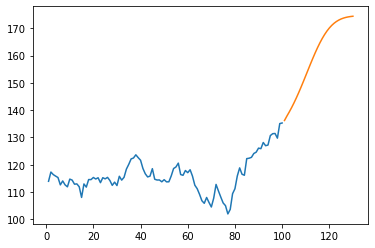

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

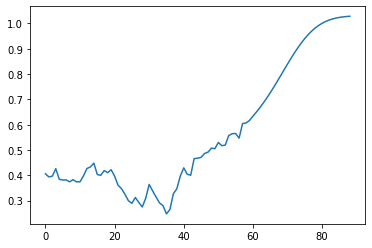

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

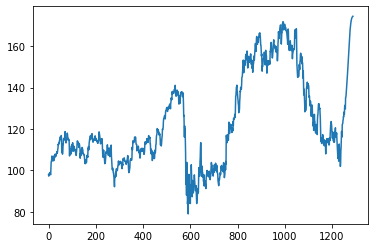

In [45]:
plt.plot(df3)